In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

class MyOwnLinearRegression:
    """A Linear Regression model built from scratch using numpy and pandas"""

    def __init__(self):

        self.weights = None # Starts as none to avoid confusion
        self.bias = 0 # Starts at 0
        self.best_mse = float('inf')
        self.no_improve_count = 0
    
    def train(self, X, y, epochs=100, alpha=0.01):

        """
        Training the model using gradient descent
        Accepts the features (X) and the target values (y)
        """

        if isinstance(X, pd.Series):
            X = X.values.reshape(-1, 1)

        else:
            X = X.values  # (m, n_features)

        y = y.values.reshape(-1, 1)  # (m, 1) always

        self.X = X
        self.y = y

        if type(self.X) == pd.Series:

            self.amount_of_features = 1
        else:

            self.amount_of_features = self.X.shape[1] # Amount of features is the amount of weights and biases
        
        print("Training started...")
        print("X shape:", X.shape)

        self.weights = np.random.rand(self.amount_of_features, 1)
        print("Weights initialized:", self.weights.shape)


        for epoch in range(epochs+1): # Main loop

            print("Weights shape inside loop:", self.weights.shape)
            print("X shape inside loop:", self.X.shape)

            self.predictions = X.dot(self.weights) + self.bias # Calculates predictions
            
            # Gradient descent!
            
            self.error = self.predictions - self.y # Error between predictions and actual
            self.m = len(self.X) # Amount of data points

            gradient_w = (1/self.m) * X.T.dot(self.error)  # shape: (n_features, 1), Calculates the gradient for the weights
            gradient_b = (1/self.m) * np.sum(self.error)  # scalar, Calculates the gradient for the bias

            self.alpha = alpha

            # Adjusts the weights and the bias by the learning rate multipled by the gradient, subtracted from the previous weight
            self.weights -= alpha * gradient_w
            self.bias -= alpha * gradient_b

            
            # Prings the the mean squared error loss
            self.mse = np.mean((self.predictions - self.y) ** 2)
            # print(self.mse)

            # Checks to see if the model has not improved in 10 epochs, if it has not, it breaks the training process
            if self.mse < self.best_mse:

                self.best_mse = self.mse
                self.no_improve_count = 0

            else:

                self.no_improve_count +=1

            if self.no_improve_count == 10:

                print("Model has stopped improving. \nStopping training now.")
                break

            print(f"Epoch {epoch}: weights shape {self.weights.shape}, X shape {X.shape}, weights: {self.weights}, mse: {self.mse}")
            print("\n\n\n")

        print(self.weights)
        print(self.bias)

    def predict(self, inputs):
        if isinstance(inputs, pd.Series) or isinstance(inputs, pd.DataFrame):
            inputs = inputs.values

        if inputs.ndim == 1:
            inputs = inputs.reshape(-1, 1)

        return inputs.dot(self.weights) + self.bias

In [3]:
# Set default figure size for all plots (width, height) in inches
plt.rcParams['figure.figsize'] = (12, 8)

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv")
df["age"] = (df["age"] - df["age"].mean()) / df["age"].std()
df["bmi"] = (df["bmi"] - df["bmi"].mean()) / df["bmi"].std()

df["charges"] = (df["charges"] - df["charges"].mean()) / df["charges"].std()

In [5]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [6]:
model = MyOwnLinearRegression()

In [7]:
print(type(model))

<class '__main__.MyOwnLinearRegression'>


In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
model = MyOwnLinearRegression()
model.train(X=df[["age"]], y=df["charges"], alpha=0.01, epochs=100)

Training started...
X shape: (1338, 1)
Weights initialized: (1, 1)
Weights shape inside loop: (1, 1)
X shape inside loop: (1338, 1)
Epoch 0: weights shape (1, 1), X shape (1338, 1), weights: [[0.17144728]], mse: 0.9265030467315427




Weights shape inside loop: (1, 1)
X shape inside loop: (1338, 1)
Epoch 1: weights shape (1, 1), X shape (1338, 1), weights: [[0.17272194]], mse: 0.9261731609782015




Weights shape inside loop: (1, 1)
X shape inside loop: (1338, 1)
Epoch 2: weights shape (1, 1), X shape (1338, 1), weights: [[0.17398386]], mse: 0.9258498350696156




Weights shape inside loop: (1, 1)
X shape inside loop: (1338, 1)
Epoch 3: weights shape (1, 1), X shape (1338, 1), weights: [[0.17523317]], mse: 0.9255329385619491




Weights shape inside loop: (1, 1)
X shape inside loop: (1338, 1)
Epoch 4: weights shape (1, 1), X shape (1338, 1), weights: [[0.17646999]], mse: 0.9252223436052677




Weights shape inside loop: (1, 1)
X shape inside loop: (1338, 1)
Epoch 5: weights shape (1, 1

In [10]:
sklearnmodel = LinearRegression().fit(df[["age"]], df.charges)

In [11]:
predictions1 = model.predict(df[["age"]])

In [12]:
predictions2 = sklearnmodel.predict(df[["age"]])

Text(0.5, 1.0, 'MINE')

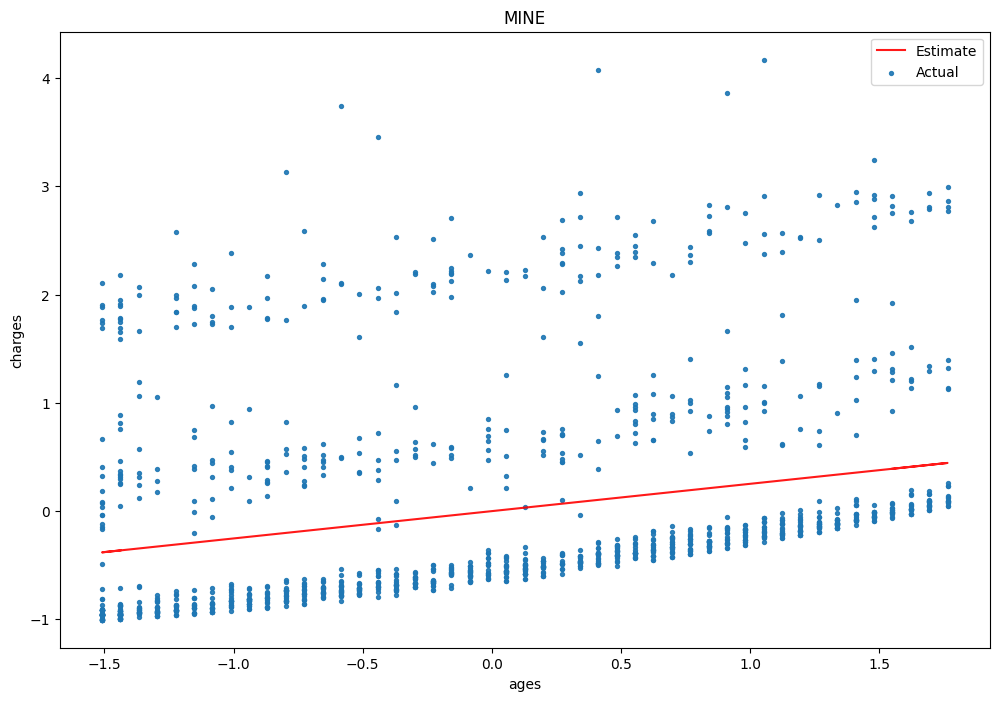

In [13]:
target = df.charges

plt.plot(df.age, predictions1, 'r', alpha=0.9)
plt.scatter(df.age, target, s=8, alpha=0.9)
plt.xlabel("ages")
plt.ylabel("charges")
plt.legend(["Estimate", "Actual"])
plt.title("MINE")

Text(0.5, 1.0, 'NOT MINE')

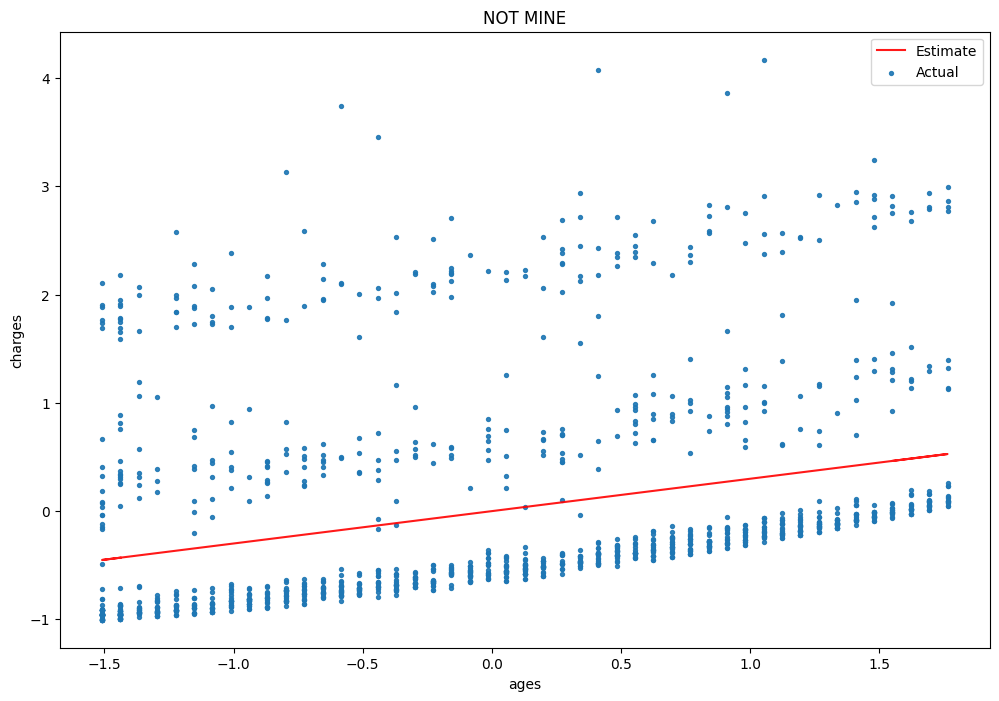

In [14]:
target = df.charges

plt.plot(df.age, predictions2, 'r', alpha=0.9)
plt.scatter(df.age, target, s=8, alpha=0.9)
plt.xlabel("ages")
plt.ylabel("charges")
plt.legend(["Estimate", "Actual"])
plt.title("NOT MINE")

In [15]:
model.weights

array([[0.25228151]])

In [16]:
sklearnmodel.coef_

array([0.29900819])

In [17]:
model.bias

np.float64(-2.590188485552982e-17)

In [18]:
sklearnmodel.intercept_

np.float64(-2.698385297347079e-17)

In [19]:
model.predict(pd.Series(18))

array([[4.54106723]])

In [20]:
sklearnmodel.predict(np.array([[18]]))

c:\Users\Ansh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.38214748])